Nama : Diggy Bani Nusantara; Kelas : Belajar Machine Learning Untuk Pemula; No. Registrasi : 1494037162101-336; Program : FGA; Model Fruit Image Classification Model Deployment using TF-Lite;

In [2]:
#Library
import zipfile
import os
import glob 
import warnings

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

from keras.preprocessing import image
import keras.utils as image
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [3]:
#Dataset
!pip install -q Kaggle

uploaded = files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d sshikamaru/fruit-recognition

Saving kaggle.json to kaggle.json
 89% 91.0M/102M [00:00<00:00, 120MB/s] 
100% 102M/102M [00:01<00:00, 97.7MB/s]


In [4]:
#Extract
extract_zip = 'fruit-recognition.zip'
out_zip = zipfile.ZipFile(extract_zip, 'r')
out_zip.extractall('/content/datasets')
out_zip.close()

In [26]:
#Location
dir_dataset = "/content/datasets/train/train"
dir_mango = os.path.join("/content/datasets/train/train/Mango")
dir_orange = os.path.join("/content/datasets/train/train/Orange")
dir_pear = os.path.join("/content/datasets/train/train/Pear")

In [27]:
#Jumlah Data
total_image = len(list(glob.iglob("/content/datasets/train/train/*/*.*", recursive=True)))
print("Total Data Image JPEG     : ",total_image)

total_mango = len(os.listdir(dir_mango))
total_orange = len(os.listdir(dir_orange))
total_pear = len(os.listdir(dir_pear))

print("Total Data Mango Image    : ",total_mango)
print("Total Data Orange Image   : ",total_orange)
print("Total Data Pear Image     : ",total_pear)

Total Data Image JPEG     :  1665
Total Data Mango Image    :  490
Total Data Orange Image   :  479
Total Data Pear Image     :  696


In [28]:
#Delete Unused Datasets
!rm -rf /content/datasets/train/train/'Apple Braeburn'
!rm -rf /content/datasets/train/train/'Apple Granny Smith'
!rm -rf /content/datasets/train/train/Apricot
!rm -rf /content/datasets/train/train/Avocado
!rm -rf /content/datasets/train/train/Banana
!rm -rf /content/datasets/train/train/Blueberry
!rm -rf /content/datasets/train/train/'Cactus fruit'
!rm -rf /content/datasets/train/train/Cantaloupe
!rm -rf /content/datasets/train/train/Cherry
!rm -rf /content/datasets/train/train/Clementine
!rm -rf /content/datasets/train/train/Corn
!rm -rf /content/datasets/train/train/'Cucumber Ripe'
!rm -rf /content/datasets/train/train/'Grape Blue'
!rm -rf /content/datasets/train/train/Kiwi
!rm -rf /content/datasets/train/train/Lemon
!rm -rf /content/datasets/train/train/Limes
!rm -rf /content/datasets/train/train/'Onion White'
!rm -rf /content/datasets/train/train/Papaya
!rm -rf /content/datasets/train/train/'Passion Fruit'
!rm -rf /content/datasets/train/train/Peach
!rm -rf /content/datasets/train/train/'Pepper Green'
!rm -rf /content/datasets/train/train/'Pepper Red'
!rm -rf /content/datasets/train/train/Pineapple
!rm -rf /content/datasets/train/train/Plum
!rm -rf /content/datasets/train/train/Pomegranate
!rm -rf /content/datasets/train/train/'Potato Red'
!rm -rf /content/datasets/train/train/Raspberry
!rm -rf /content/datasets/train/train/Strawberry
!rm -rf /content/datasets/train/train/Tomato
!rm -rf /content/datasets/train/train/Watermelon
!ls /content/datasets/train/train/

Mango  Orange  Pear


In [29]:
#Validation 20%
val_size = 0.2

train_datagen = ImageDataGenerator(
    rotation_range = 30,
    brightness_range = [0.2,1.0],
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = "nearest",
    rescale = 1./255,
    validation_split = val_size
)

validation_datagen = ImageDataGenerator(
    rotation_range = 30,
    brightness_range = [0.2,1.0],
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = "nearest",
    rescale = 1./255,
    validation_split = val_size
)

In [30]:
# Train dan Validation
train_generator = train_datagen.flow_from_directory(
    dir_dataset,
    target_size = (150,150),
    color_mode = "rgb",
    class_mode = "categorical",
    batch_size = 16,
    shuffle = True,
    subset = "training"
)

validation_generator = validation_datagen.flow_from_directory(
    dir_dataset,
    target_size = (150,150),
    color_mode = "rgb",
    class_mode = "categorical",
    batch_size = 16,
    shuffle = False,
    subset = "validation"
)

Found 1333 images belonging to 3 classes.
Found 332 images belonging to 3 classes.


In [35]:
#Model Sequential Using Conv2D dan MaxPooling
Model = Sequential(
    [
     Conv2D(32, (3,3), strides = (1,1), activation = 'relu' , input_shape = (150,150,3)),
     MaxPooling2D(pool_size = (2,2), padding = 'valid'),
     Conv2D(64, (3,3), strides = (1,1), activation = 'relu' ),
     MaxPooling2D(pool_size = (2,2), padding = 'valid'),
     Conv2D(128, (3,3), strides = (1,1), activation = 'relu' ),
     MaxPooling2D(pool_size = (2,2), padding = 'valid'),
     Flatten(),
     Dropout(0.2),
     Dense(128, activation = 'relu'),
     Dense(3, activation='softmax')
    ]
)

In [36]:
#Optimizer
Adam(learning_rate=0.00128, name='adam')
Model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [37]:
def scheduler(epoch, lr):
  if epoch < 5:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

#Callback
lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler, verbose=1)
tb_callback = tf.keras.callbacks.TensorBoard(
    log_dir='logs', histogram_freq=0, write_graph=True, write_images=False,
    update_freq='epoch', embeddings_freq=0,
    embeddings_metadata=None
)

Model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 17, 17, 128)     

In [38]:
#Training
batch_size = 16
history = Model.fit(train_generator, 
                  epochs =  10, 
                  steps_per_epoch = 1333//batch_size,
                  validation_data = validation_generator, 
                  verbose = 1, 
                  validation_steps = 332//batch_size,
                  callbacks =[lr_schedule, tb_callback])


Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/10
83/83 [==============================] - 66s 783ms/step - loss: 0.1982 - accuracy: 0.9377 - val_loss: 0.0076 - val_accuracy: 0.9937 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/10
83/83 [==============================] - 66s 794ms/step - loss: 0.0101 - accuracy: 0.9985 - val_loss: 0.0024 - val_accuracy: 1.0000 - lr: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/10
83/83 [==============================] - 65s 781ms/step - loss: 7.0878e-04 - accuracy: 1.0000 - val_loss: 1.0661e-04 - val_accuracy: 1.0000 - lr: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 4/10
83/83 [==============================] - 65s 778ms/step - loss: 0.1082 - accuracy: 0.9752 - val_loss: 0.0040 - val_accuracy: 1.0000 - lr: 0.0010

Epoch 5: LearningRateScheduler setting learning

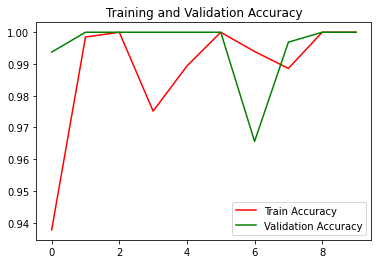

<Figure size 432x288 with 0 Axes>

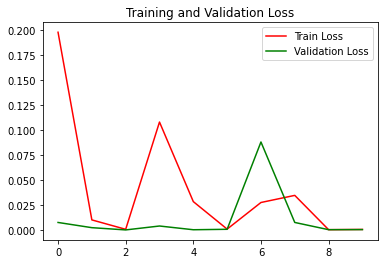

<Figure size 432x288 with 0 Axes>

In [39]:
#Accuracy 
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
#Loss 
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

#Plot Accruracy
plt.plot(epochs, acc, 'r', label='Train Accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

#Plot Loss
plt.plot(epochs, loss, 'r', label='Train Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

Saving 0500.jpg to 0500.jpg
1/1 [==============================] - 0s 33ms/step
Buah Jeruk


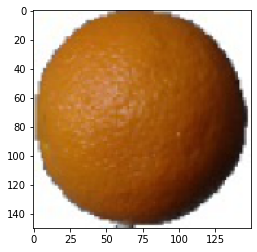

In [45]:
#Upload File
uploaded = files.upload()

#Condition
for file_upload in uploaded.keys():

  path = file_upload
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = Model.predict(images, batch_size=16)

  if classes[0][0] == 1:
    print('Buah Mangga')
  elif classes[0][1] == 1:
    print('Buah Jeruk')
  else:
    print('Buah Pir')

In [46]:
#Ignore Warnings
warnings.filterwarnings('ignore')

#Convert Model to TF-Lite
converter = tf.lite.TFLiteConverter.from_keras_model(Model)
tflite_model = converter.convert()

#Save Model TF-Lite
with open('fruit_model.tflite', 'wb') as f:
  f.write(tflite_model)